Shape of DataFrame: (1000, 10)
Column names: Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation'],
      dtype='object')
Data types:
 brand                 object
title                 object
type                  object
price                float64
priceWithCurrency     object
available            float64
availableText         object
sold                 float64
lastUpdated           object
itemLocation          object
dtype: object
Summary statistics:
              price   available          sold
count  1000.000000  869.000000    984.000000
mean     39.892980   21.426928    497.321138
std      29.072186   51.476703   1372.510561
min       1.990000    2.000000      1.000000
25%      20.700000    6.000000     15.000000
50%      32.990000   10.000000     52.000000
75%      49.990000   10.000000    263.750000
max     299.990000  557.000000  17854.000000
Fitted parameters:
  a = 15897.00
  b = 0.6755
  c

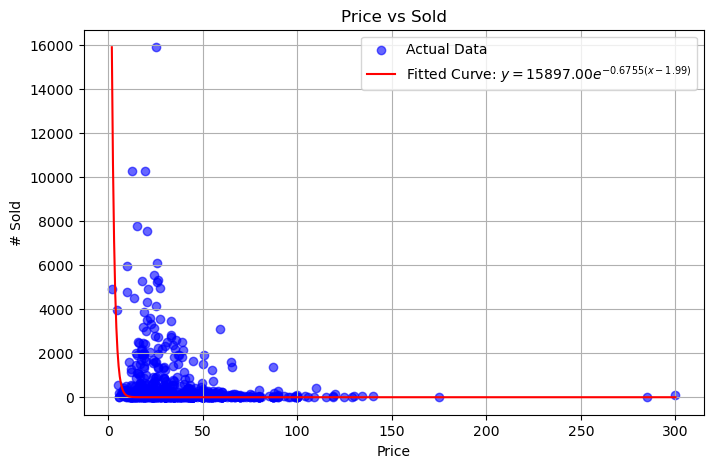

In [1]:
"""
A WIP, try to fit predictive curve better
"""

from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score

df = pd.read_csv("data2.csv")
print("Shape of DataFrame:", df.shape)
print("Column names:", df.columns)
print("Data types:\n", df.dtypes)
print("Summary statistics:\n", df.describe())

df = df.dropna() # maybe consider limiting the range of data
x = df['price'].values
y = df['sold'].values

# exponential decay function
def shifted_exp_func(x, a, b, c): #maybe shift even more
    return a * np.exp(-b * (x - c))

# a = max sales
# b = small positive decay rate
# c = shift to the left, start near min(x)

initial_guess = [max(y)*2, 0.01, min(x)]
bounds = ([max(y), 0.0001, min(x)], [max(y)*10, 1.0, max(x)])

params, covariance = curve_fit(shifted_exp_func, x, y, p0=initial_guess, bounds=bounds, maxfev=10000)
a_fit, b_fit, c_fit = params

print(f"Fitted parameters:\n  a = {a_fit:.2f}\n  b = {b_fit:.4f}\n  c = {c_fit:.2f}")

y_pred = shifted_exp_func(x, a_fit, b_fit, c_fit)

r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

df2 = pd.DataFrame({'Price': x, 'Actual_Sold': y, 'Predicted_Sold': y_pred})
print(df2.head())

x_range = np.linspace(x.min(), x.max(), 500)
y_fit = shifted_exp_func(x_range, a_fit, b_fit, c_fit)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Actual Data', color='blue', alpha=0.6)
plt.plot(x_range, y_fit, label=f'Fitted Curve: $y = {a_fit:.2f} e^{{-{b_fit:.4f}(x - {c_fit:.2f})}}$', color='red')
plt.title('Price vs Sold')
plt.xlabel('Price')
plt.ylabel('# Sold')
plt.legend()
plt.grid(True)
plt.show()